In [1]:
import torch
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
from implementation.utils import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### EfficientNet B0 w/  RandomAffine, Flip, Crop, Rotate, Erase...


In [2]:
tsfm = [transforms.RandomHorizontalFlip(p=0.2),
        transforms.RandomVerticalFlip(p=0.2),
        transforms.RandomRotation(degrees=20),
        transforms.RandomResizedCrop(224, scale=(0.5, 0.9), ratio=(0.75, 1.33)),
        transforms.RandomAffine(degrees=15, scale=(0.6, 0.9), shear=10),
        transforms.ToTensor(),  
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        transforms.RandomErasing(p=0.15, scale=(0.02, 0.33), ratio=(0.3, 1.3), value=0, inplace=False)]

train_data, val_data, test_data = get_dataset(tsfm)

model = EfficientNet.from_name("efficientnet-b0", override_params={'num_classes': 101})
epochs = 90
batch_size = 128

In [3]:
# GPU usage: 13533MiB 
train(model, train_data, val_data, epochs, batch_size)

EPOCH:  0, TRAIN_LOSS: 3.73607, VAL_ACCU: 0.0939, EXE TIME:  49s
EPOCH:  1, TRAIN_LOSS: 3.33405, VAL_ACCU: 0.0939, EXE TIME:  49s
EPOCH:  2, TRAIN_LOSS: 3.48055, VAL_ACCU: 0.0939, EXE TIME:  49s
EPOCH:  3, TRAIN_LOSS: 3.09228, VAL_ACCU: 0.0138, EXE TIME:  49s
EPOCH:  4, TRAIN_LOSS: 3.35687, VAL_ACCU: 0.0939, EXE TIME:  49s
EPOCH:  5, TRAIN_LOSS: 2.82677, VAL_ACCU: 0.0069, EXE TIME:  49s
EPOCH:  6, TRAIN_LOSS: 3.05440, VAL_ACCU: 0.0069, EXE TIME:  49s
EPOCH:  7, TRAIN_LOSS: 2.60288, VAL_ACCU: 0.0236, EXE TIME:  49s
EPOCH:  8, TRAIN_LOSS: 2.94540, VAL_ACCU: 0.0340, EXE TIME:  49s
EPOCH:  9, TRAIN_LOSS: 2.47728, VAL_ACCU: 0.1020, EXE TIME:  49s
EPOCH: 10, TRAIN_LOSS: 2.29497, VAL_ACCU: 0.2759, EXE TIME:  48s
EPOCH: 11, TRAIN_LOSS: 2.17626, VAL_ACCU: 0.3450, EXE TIME:  49s
EPOCH: 12, TRAIN_LOSS: 2.62783, VAL_ACCU: 0.3508, EXE TIME:  49s
EPOCH: 13, TRAIN_LOSS: 2.15173, VAL_ACCU: 0.4113, EXE TIME:  49s
EPOCH: 14, TRAIN_LOSS: 2.21976, VAL_ACCU: 0.4315, EXE TIME:  49s
EPOCH: 15, TRAIN_LOSS: 1.

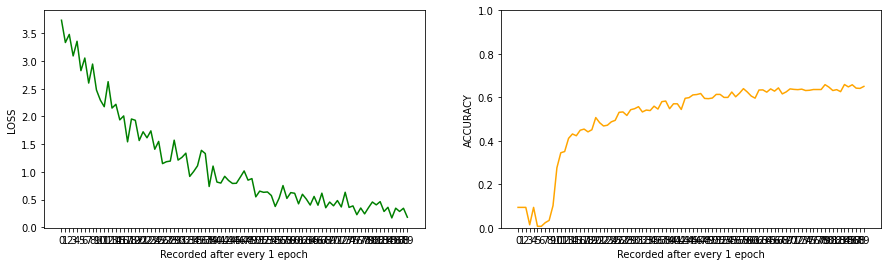

In [4]:
plot_graph()

In [5]:
evaluate(model, test_data, print_accu=True)

VALIDATE ACCURACY: 65.42%
